In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

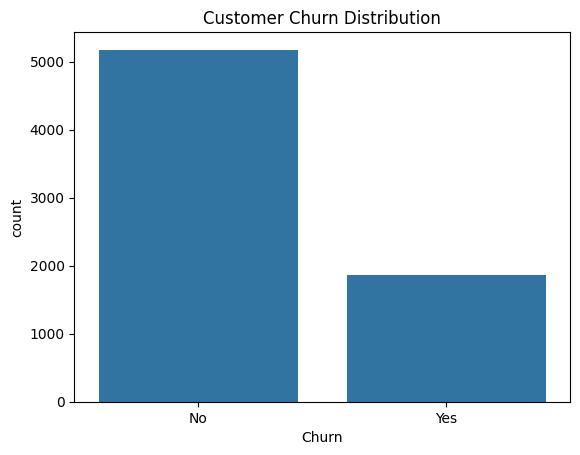

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.show()

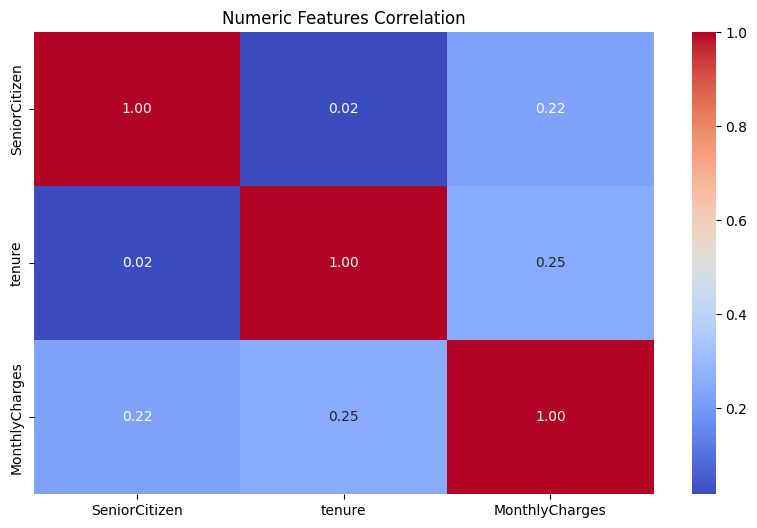

In [8]:
# Correlation between numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numeric Features Correlation')
plt.show()

In [9]:
# Note: TotalCharges and MonthlyCharges/Tenure show high correlation
# Consider checking multicollinearity or creating ratio features in feature engineering

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df["TotalCharges"].head(20)

0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
13     5036.3
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19     1862.9
Name: TotalCharges, dtype: object

In [12]:
df["TotalCharges"].value_counts().head(10)

TotalCharges
20.2     11
         11
19.75     9
19.65     8
19.9      8
20.05     8
19.55     7
45.3      7
19.45     6
20.25     6
Name: count, dtype: int64

In [13]:
(df["TotalCharges"] == " ").sum()

np.int64(11)

In [14]:
# Check for any type of missing value 
placeholders = ["NA", "N/A", "Unknown"]

(df.isnull() | (df == " ") | df.isin(placeholders)).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
# We have 11 null-empty values in TotalCharges.
# Dropping them is fine, as they represent <0.2% of the data.

In [16]:
# Numerical features
num_features = df.select_dtypes(include=["int64", "float64"]).columns
print("Numerical features:", num_features)

# Categorical features
cat_features = df.select_dtypes(include=["object"]).columns
print("Categorical features:", cat_features)


Numerical features: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')
Categorical features: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [17]:
# Check churn distribution per category
for col in cat_features:
    print(f"\n{col} distribution with Churn:")
    print(pd.crosstab(df[col], df["Churn"], normalize="index"))


customerID distribution with Churn:
Churn        No  Yes
customerID          
0002-ORFBO  1.0  0.0
0003-MKNFE  1.0  0.0
0004-TLHLJ  0.0  1.0
0011-IGKFF  0.0  1.0
0013-EXCHZ  0.0  1.0
...         ...  ...
9987-LUTYD  1.0  0.0
9992-RRAMN  0.0  1.0
9992-UJOEL  1.0  0.0
9993-LHIEB  1.0  0.0
9995-HOTOH  1.0  0.0

[7043 rows x 2 columns]

gender distribution with Churn:
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603

Partner distribution with Churn:
Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649

Dependents distribution with Churn:
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502

PhoneService distribution with Churn:
Churn               No       Yes
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096

MultipleLines distribution with Churn:
Churn 

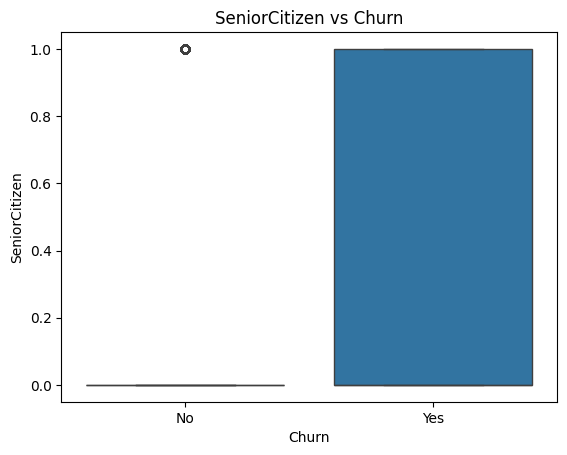

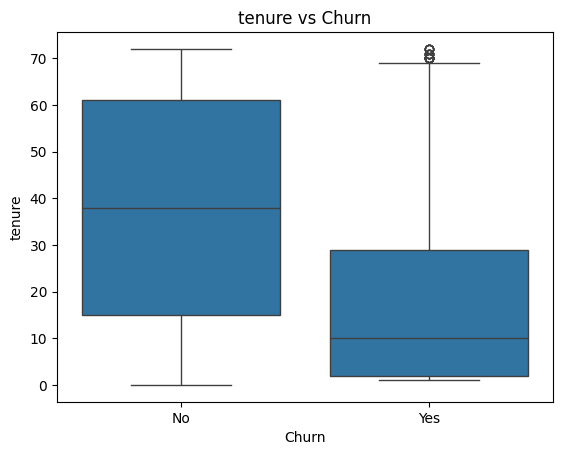

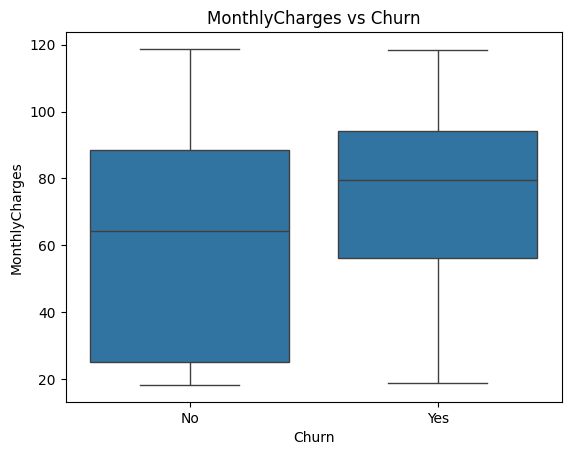

In [18]:
# Create box plots for num features
for col in num_features:
    sns.boxplot(x="Churn", y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

In [19]:
# Compare mean and median of numeric features by Churn
summary = df.groupby("Churn")[num_features].agg(["mean", "median"])
summary

SeniorCitizen            tenure        MonthlyCharges        
               mean median       mean median           mean  median
Churn                                                              
No         0.128721    0.0  37.569965   38.0      61.265124  64.425
Yes        0.254682    0.0  17.979133   10.0      74.441332  79.650

In [20]:
# Observed outliers during EDA. no removal applied at baseline stage

In [ ]:
# NOT BELONG IN EDA , THEY WILL BE MOVED


In [66]:
# Separate features and target
# Churn was categorical, so it converted into a dummy column with the name 'Churn_Yes'
X = df_encoded.drop("Churn_Yes", axis=1)
y = df_encoded["Churn_Yes"]

In [67]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
# Train a baseline Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [69]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1033
        True       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [70]:
print('The baseline Logistic Regression model achieves an overall accuracy of 80%, but recall for churned customers (57%) is relatively low. This means that a significant portion of customers who actually churn are not being detected by the model, which is risky in a churn prediction context. Precision for churn is acceptable (65%), indicating a reasonable trade-off at this stage. Since recall is more critical than precision for churn prevention, the next steps will focus on improving recall by addressing class imbalance and adjusting the decision threshold. We will start by applying class weighting to the Logistic Regression model before exploring more advanced models.')

The baseline Logistic Regression model achieves an overall accuracy of 80%, but recall for churned customers (57%) is relatively low. This means that a significant portion of customers who actually churn are not being detected by the model, which is risky in a churn prediction context. Precision for churn is acceptable (65%), indicating a reasonable trade-off at this stage. Since recall is more critical than precision for churn prevention, the next steps will focus on improving recall by addressing class imbalance and adjusting the decision threshold. We will start by applying class weighting to the Logistic Regression model before exploring more advanced models.


In [71]:
# Train Logistic Regression with class imbalance handling
model_balanced = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

# Fit model
model_balanced.fit(X_train, y_train)

# Make predictions
y_pred_balanced = model_balanced.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

       False       0.89      0.74      0.81      1033
        True       0.51      0.76      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.75      0.76      1407



In [72]:
print('The Logistic Regression model with class_weight=balanced increases recall for churned customers from 0.57 to 0.76, meaning it detects many more actual churners. Precision drops slightly from 0.65 to 0.51, which is expected due to the trade-off: the model is now more sensitive and predicts churn more often, catching more true churners at the cost of some false alarms. Accuracy drops slightly (80% → 75%), but recall is prioritized since missing a churned customer is costlier than a false alarm. Next, we visualize probability distributions and curves to select an optimal threshold.')

The Logistic Regression model with class_weight=balanced increases recall for churned customers from 0.57 to 0.76, meaning it detects many more actual churners. Precision drops slightly from 0.65 to 0.51, which is expected due to the trade-off: the model is now more sensitive and predicts churn more often, catching more true churners at the cost of some false alarms. Accuracy drops slightly (80% → 75%), but recall is prioritized since missing a churned customer is costlier than a false alarm. Next, we visualize probability distributions and curves to select an optimal threshold.


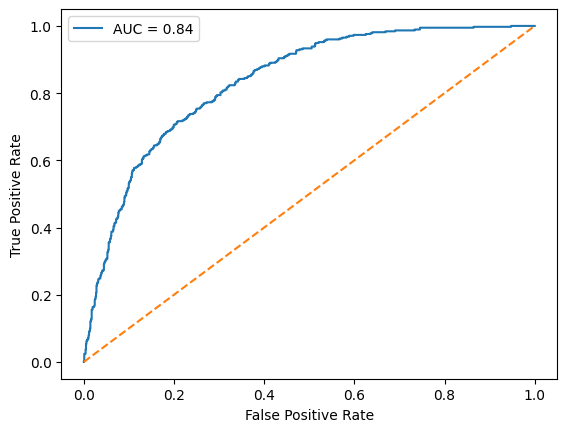

In [73]:
# Get predicted probabilities for the positive class (churn)
y_probs = model_balanced.predict_proba(X_test)[:, 1]

# Plot ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# ROC curve shows overall model ability to separate churn vs non-churn
# Higher AUC means better discrimination

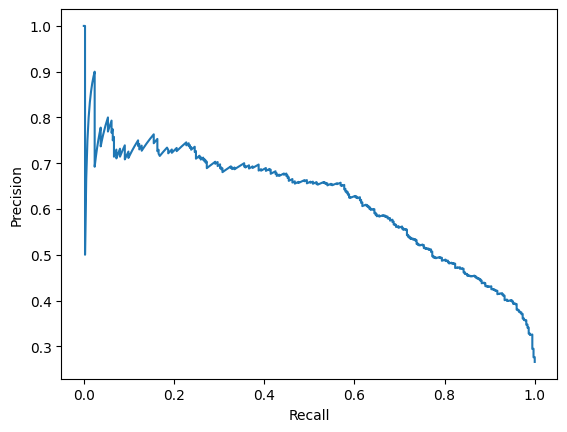

In [74]:
# Plot Precision-Recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# Precision-Recall curve shows trade-off between catching churners (recall) and false alarms (precision)
# Helps decide optimal probability threshold for business goal


In [75]:
# Define thresholds from 0.1 to 0.9
import numpy as np
thresholds = np.arange(0.1, 0.91, 0.1)

# Store results
results = []

from sklearn.metrics import precision_score, recall_score, f1_score

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)  # classify as churn if prob >= threshold
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    results.append([t, precision, recall, f1])
    
# Convert to DataFrame for easy inspection
import pandas as pd
threshold_df = pd.DataFrame(results, columns=["threshold", "precision", "recall", "f1"])
threshold_df


,threshold,precision,recall,f1
0,0.1,0.356378,0.978610,0.522484
1,0.2,0.397982,0.949198,0.560821
2,0.3,0.428934,0.903743,0.581756
3,0.4,0.471927,0.831551,0.602130
4,0.5,0.514545,0.756684,0.612554
5,0.6,0.572383,0.687166,0.624544
6,0.7,0.652439,0.572193,0.609687
7,0.8,0.689266,0.326203,0.442831
8,0.9,0.900000,0.024064,0.046875


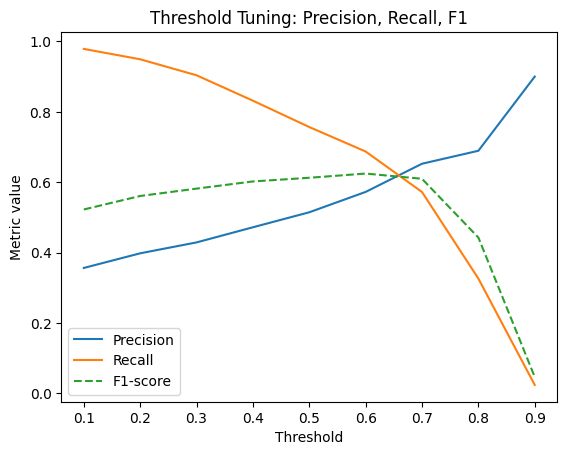

In [76]:
# Plot precision and recall for each threshold
plt.plot(threshold_df['threshold'], threshold_df['precision'], label='Precision')
plt.plot(threshold_df['threshold'], threshold_df['recall'], label='Recall')
plt.plot(threshold_df['threshold'], threshold_df['f1'], label='F1-score', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('Metric value')
plt.title('Threshold Tuning: Precision, Recall, F1')
plt.legend()
plt.show()

In [77]:
# Now we adjust decision threshold to maximize recall for churners
# Trade-off: higher recall, lower precision
# This aligns with business goal of minimizing missed churn

# Pick threshold that maximizes recall while keeping acceptable precision
optimal_threshold = 0.3  # based on the plot

# Apply optimal threshold to make final predictions
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

# Evaluate metrics at optimal threshold
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

       False       0.94      0.56      0.71      1033
        True       0.43      0.90      0.58       374

    accuracy                           0.65      1407
   macro avg       0.69      0.73      0.64      1407
weighted avg       0.81      0.65      0.67      1407

